In [ ]:
# Libraries needed to read the files
import pandas as pd

# Reading the dataset 
dataset = pd.read_csv("humor.tsv",sep='\t', header = 0)
dataset.drop(['id'], axis=1 , inplace = True)
# Viewing the data to check its format
dataset

,text,humor
0,هذا واحد عجازز كسلان قال لخويه ارسم علي ظهري م...,yes
1,غبي طاح من الدرج راح للدكتور عطاه مرهم وقال له...,yes
2,فيه واحد عصبي راح للخياط وقال خذ هذا القماش اب...,yes
3,شايب راح امريكا يتعالج عند ولده شاف وحده حلوه ...,yes
4,واحد يمشي ومعاه ارنب يبغي يبيعه فيه السوق جاه ...,yes
...,...,...
10034,المعدده تعدد وكل واحده تبكي علي بلوتها,no
10035,الناموس والدبان ما يخلي احد ينام,no
10036,الناس خيبتها السبت والاحد واحنا خيبتنا ما مرت ...,no
10037,ممكن اطلعك من بين مليون تيس لانك الغزال الوحيد...,no


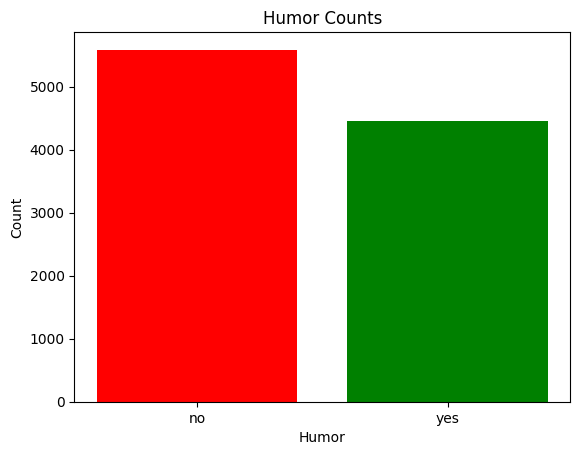

In [ ]:
import matplotlib.pyplot as plt

# Load the data
df = dataset

# Count the occurrences of the 'humor' column
humor_counts = df['humor'].value_counts()

# Create a bar plot of the humor counts with different colors
plt.bar(humor_counts.index, humor_counts.values, color=['red', 'green'])

# Set the title of the plot
plt.title('Humor Counts')

# Set the x-axis label
plt.xlabel('Humor')

# Set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Required libraries
!pip install emoji
import emoji
import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))
#from nltk.corpus import stopwords


# Text length analysis 
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

# Counting emoji
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['text'].str.len() ## this also includes spaces
dataset['avg_char_per_word'] = dataset['text'].apply(lambda x: avg_word(x))
#stop = stopwords.words('arabic')
dataset['stopwords'] = dataset['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset['emoji_count'] = dataset['text'].apply(lambda x: emoji_counter(x))
dataset = dataset.sort_values(by='word_count',ascending=[0])
dataset.head()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=78a7124524f484449b9064b3d12a3023f3db5db63c74c6b63efbc3643410a580
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count
5021,اتفق الجيران جحا في احد ايام الشتاء البارده عل...,yes,446,2354,4.280269,84,0
3509,لما خلصت امتحانات اخر سنه في طب بيطري ومن قبل ...,no,398,2023,4.085427,52,0
3674,كان الوقت ليلا وكان الليل باردا والهواء البارد...,yes,366,1895,4.180328,86,0
3604,كنت اسير في الطريق فادركني الجوع وكان معي من ا...,yes,317,1606,4.069401,64,0
3650,كانما الاقدار تابي الا ان تضايقني بالثقلاء ما ...,yes,244,1236,4.069672,51,0


In [ ]:
dataset_stat = dataset.mean(axis=0)
dataset_stat


<ipython-input-5-742ff477b979>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_stat = dataset.mean(axis=0)


word_count            19.959060
char_count           102.673972
avg_char_per_word      4.195884
stopwords              3.443769
emoji_count            0.000000
dtype: float64

In [ ]:
null_count = dataset['text'].isnull().sum()
print(null_count)
empty_string_count = (dataset['text'] == '').sum()
print(empty_string_count)


0
0


In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))

def stopRemoval(text):
    # Tokenize the input text into individual words
    temptweet = word_tokenize(text)
    
    # Remove stopwords and words with length less than 2 from the tokenized text
    text = " ".join([w for w in temptweet if not w in stop and len(w) >= 2])
    
    # Return the processed text
    return text

# Assuming that 'dataset' is a DataFrame with a column named 'text'
# Apply the stopRemoval function to each text in the 'text' column
dataset['noStop_tweet'] = dataset['text'].apply(lambda x:stopRemoval(x))

# Display the updated dataset
dataset.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet
5021,اتفق الجيران جحا في احد ايام الشتاء البارده عل...,yes,446,2354,4.280269,84,0,اتفق الجيران جحا احد ايام الشتاء البارده علي ا...
3509,لما خلصت امتحانات اخر سنه في طب بيطري ومن قبل ...,no,398,2023,4.085427,52,0,خلصت امتحانات اخر سنه طب بيطري حتي النتيجه تطل...
3674,كان الوقت ليلا وكان الليل باردا والهواء البارد...,yes,366,1895,4.180328,86,0,الوقت ليلا وكان الليل باردا والهواء البارد يضر...
3604,كنت اسير في الطريق فادركني الجوع وكان معي من ا...,yes,317,1606,4.069401,64,0,كنت اسير الطريق فادركني الجوع وكان معي الزاد ي...
3650,كانما الاقدار تابي الا ان تضايقني بالثقلاء ما ...,yes,244,1236,4.069672,51,0,كانما الاقدار تابي الا ان تضايقني بالثقلاء مام...


In [ ]:
# Required libraries
import re

def normalize(text):
    # remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text=pattern.sub(r"\1\1", text)
    # normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    #text = text.replace(u"\u0621", u"\u0627")  # HAMZA, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF
    # normalize taa
    text=text.replace(u"\u0629", u"\u0647") # taa' marbuuTa, with haa'
    # normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura
    # remove diacritics 
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    return text

dataset['normalized_tweet'] = dataset['text'].apply(lambda x: normalize(x))

# aggregate all preprocessing steps into one column for the next step
dataset['n_text'] = dataset['noStop_tweet'].apply(lambda x:normalize(x))

dataset.head()


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,n_text
5021,اتفق الجيران جحا في احد ايام الشتاء البارده عل...,yes,446,2354,4.280269,84,0,اتفق الجيران جحا احد ايام الشتاء البارده علي ا...,اتفق الجىران جحا فى احد اىام الشتاء البارده عل...,اتفق الجىران جحا احد اىام الشتاء البارده على ا...
3509,لما خلصت امتحانات اخر سنه في طب بيطري ومن قبل ...,no,398,2023,4.085427,52,0,خلصت امتحانات اخر سنه طب بيطري حتي النتيجه تطل...,لما خلصت امتحانات اخر سنه فى طب بىطرى ومن قبل ...,خلصت امتحانات اخر سنه طب بىطرى حتى النتىجه تطل...
3674,كان الوقت ليلا وكان الليل باردا والهواء البارد...,yes,366,1895,4.180328,86,0,الوقت ليلا وكان الليل باردا والهواء البارد يضر...,كان الوقت لىلا وكان اللىل باردا والهواء البارد...,الوقت لىلا وكان اللىل باردا والهواء البارد ىضر...
3604,كنت اسير في الطريق فادركني الجوع وكان معي من ا...,yes,317,1606,4.069401,64,0,كنت اسير الطريق فادركني الجوع وكان معي الزاد ي...,كنت اسىر فى الطرىق فادركنى الجوع وكان معى من ا...,كنت اسىر الطرىق فادركنى الجوع وكان معى الزاد ى...
3650,كانما الاقدار تابي الا ان تضايقني بالثقلاء ما ...,yes,244,1236,4.069672,51,0,كانما الاقدار تابي الا ان تضايقني بالثقلاء مام...,كانما الاقدار تابى الا ان تضاىقنى بالثقلاء ما ...,كانما الاقدار تابى الا ان تضاىقنى بالثقلاء مام...


In [ ]:
# Required libraries
import string 
import re

# Defining Arabic punctuation marks as a list
arabic_punctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"]

# Importing English punctuation marks
english_punctuations = string.punctuation

# Converting the English punctuation from a string to an array for processing
english_punctuations = [word.strip() for word in english_punctuations]

# Creating a list of all punctuation marks by combining Arabic and English punctuations
punctuations_list = arabic_punctuations + english_punctuations

def removing_punctuation(text):
    clean_tweet = ''
    for char in text:
        # Check if the character is not in the list of Arabic punctuations
        if char not in arabic_punctuations:
            clean_tweet = clean_tweet + '' + char 
    return clean_tweet

# Assuming there is a DataFrame named 'dataset' with a column named 'text'

# Apply the 'removing_punctuation' function to each text in the 'text' column
# and assign the result to a new column named 'no_punc_tweet'
dataset['no_punc_tweet'] = dataset['text'].apply(lambda x: removing_punctuation(x))

# Assuming there is a column named 'n_text' in the dataset
# Apply the 'removing_punctuation' function to each text in the 'n_text' column
# and assign the result to the same 'n_text' column
dataset['n_text'] = dataset['n_text'].apply(lambda x: removing_punctuation(x))

# Display a random sample of 5 rows from the dataset
dataset.sample(5)


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,n_text,noPunc_tweet
7415,فيه قروي قالو له بكره عيد الحب قال وين بيصلون,yes,10,45,3.600000,2,0,قروي قالو بكره عيد الحب قال وين بيصلون,فىه قروى قالو له بكره عىد الحب قال وىن بىصلون,قروى قالو بكره عىد الحب قال وىن بىصلون,فيه قروي قالو له بكره عيد الحب قال وين بيصلون
6507,احتاج اتعرف علي مليونير اقتنع ان الفلوس وصخ دنيا,no,9,48,4.444444,0,0,احتاج اتعرف علي مليونير اقتنع ان الفلوس وصخ دنيا,احتاج اتعرف على ملىونىر اقتنع ان الفلوس وصخ دنىا,احتاج اتعرف على ملىونىر اقتنع ان الفلوس وصخ دنىا,احتاج اتعرف علي مليونير اقتنع ان الفلوس وصخ دنيا
7426,فيه غبي دخل محل انترنت شاف مكتوب الساعه بعشره ...,yes,14,69,4.000000,3,0,غبي دخل محل انترنت شاف مكتوب الساعه بعشره قاله...,فىه غبى دخل محل انترنت شاف مكتوب الساعه بعشره ...,غبى دخل محل انترنت شاف مكتوب الساعه بعشره قاله...,فيه غبي دخل محل انترنت شاف مكتوب الساعه بعشره ...
4842,الاقتباس غريب مدري ليه الحلطمه ومتضايقين من كل...,no,49,265,4.428571,6,0,الاقتباس غريب مدري ليه الحلطمه ومتضايقين كلامك...,الاقتباس غرىب مدرى لىه الحلطمه ومتضاىقىن من كل...,الاقتباس غرىب مدرى لىه الحلطمه ومتضاىقىن كلامك...,الاقتباس غريب مدري ليه الحلطمه ومتضايقين من كل...
3067,هدا واحد ربح في لوطو الرهان يعني قال نشرجيها ي...,no,26,145,4.615385,5,0,هدا ربح لوطو الرهان يعني قال نشرجيها يعني نفلي...,هدا واحد ربح فى لوطو الرهان ىعنى قال نشرجىها ى...,هدا ربح لوطو الرهان ىعنى قال نشرجىها ىعنى نفلى...,هدا واحد ربح في لوطو الرهان يعني قال نشرجيها ي...


In [ ]:
import re

def clean(text):
    # Remove extra whitespace by replacing consecutive whitespace characters with a single space
    cleaned_text = re.sub('\s+', ' ', text)
    
    # Remove numbers by replacing them with a space
    cleaned_text = re.sub("\d+", " ", cleaned_text)
    
    return cleaned_text

# Assuming there is a DataFrame named 'dataset' with a column named 'text'

# Apply the 'clean' function to each text in the 'text' column
# and assign the result to a new column named 'clean_tweet'
dataset['clean_tweet'] = dataset['text'].apply(lambda x: clean(x))

# Assuming there is a column named 'n_text' in the dataset
# Apply the 'clean' function to each text in the 'n_text' column
# and assign the result to the same 'n_text' column
dataset['n_text'] = dataset['n_text'].apply(lambda x: clean(x))

# Display a random sample of 5 rows from the dataset
dataset.sample(5)


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,n_text,noPunc_tweet,clean_tweet
8490,واحد يحب الهدوء اشتري شريط كاسيت فارغ,yes,7,37,4.428571,1,0,يحب الهدوء اشتري شريط كاسيت فارغ,واحد ىحب الهدوء اشترى شرىط كاسىت فارغ,ىحب الهدوء اشترى شرىط كاسىت فارغ,واحد يحب الهدوء اشتري شريط كاسيت فارغ,واحد يحب الهدوء اشتري شريط كاسيت فارغ
4642,النفسيه زفت دخلت طلبات وطلبت مالذ وطاب والله م...,no,13,66,4.153846,1,0,النفسيه زفت دخلت طلبات وطلبت مالذ وطاب والله م...,النفسىه زفت دخلت طلبات وطلبت مالذ وطاب والله م...,النفسىه زفت دخلت طلبات وطلبت مالذ وطاب والله م...,النفسيه زفت دخلت طلبات وطلبت مالذ وطاب والله م...,النفسيه زفت دخلت طلبات وطلبت مالذ وطاب والله م...
9090,تايه بيسال واحد ماشي في الشارع ايه اسرع طريق ا...,yes,17,89,4.294118,2,0,تايه بيسال ماشي الشارع ايه اسرع طريق اروح بيه ...,تاىه بىسال واحد ماشى فى الشارع اىه اسرع طرىق ا...,تاىه بىسال ماشى الشارع اىه اسرع طرىق اروح بىه ...,تايه بيسال واحد ماشي في الشارع ايه اسرع طريق ا...,تايه بيسال واحد ماشي في الشارع ايه اسرع طريق ا...
1835,ليله البارحه العراوي سرقوه دتسني موقفن عند الب...,yes,27,158,4.888889,2,0,ليله البارحه العراوي سرقوه دتسني موقفن الباب ل...,لىله البارحه العراوى سرقوه دتسنى موقفن عند الب...,لىله البارحه العراوى سرقوه دتسنى موقفن الباب ل...,ليله البارحه العراوي سرقوه دتسني موقفن عند الب...,ليله البارحه العراوي سرقوه دتسني موقفن عند الب...
1947,فيه واحد محشش يمشي بالشارع طاحت منه عشر ريالات...,yes,18,100,4.611111,5,0,محشش يمشي بالشارع طاحت ريالات ابو الشباب نزل خ...,فىه واحد محشش ىمشى بالشارع طاحت منه عشر رىالات...,محشش ىمشى بالشارع طاحت رىالات ابو الشباب نزل خ...,فيه واحد محشش يمشي بالشارع طاحت منه عشر ريالات...,فيه واحد محشش يمشي بالشارع طاحت منه عشر ريالات...


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the dataset to reduce bias
shuffled_dataset = shuffle(dataset)

# Split the dataset into 80% train set and 20% test set
train, test = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)

# Display the train set
train


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,n_text,noPunc_tweet,clean_tweet
5632,فيه غراب يقول ميو ميو ليش يستهبل,yes,7,32,3.714286,1,0,غراب يقول ميو ميو ليش يستهبل,فىه غراب ىقول مىو مىو لىش ىستهبل,غراب ىقول مىو مىو لىش ىستهبل,فيه غراب يقول ميو ميو ليش يستهبل,فيه غراب يقول ميو ميو ليش يستهبل
7961,نذل متعرف علي وحده قعد سنه يحاول معه تطلع يووم...,no,13,64,4.000000,0,0,نذل متعرف علي وحده قعد سنه يحاول معه تطلع يووم...,نذل متعرف على وحده قعد سنه ىحاول معه تطلع ىووم...,نذل متعرف على وحده قعد سنه ىحاول معه تطلع ىووم...,نذل متعرف علي وحده قعد سنه يحاول معه تطلع يووم...,نذل متعرف علي وحده قعد سنه يحاول معه تطلع يووم...
1944,في واحد قال للثاني تعرف بيتهوفن قال انا ما اعر...,yes,15,73,3.933333,4,0,قال للثاني تعرف بيتهوفن قال انا اعرف هوفن تبغا...,فى واحد قال للثانى تعرف بىتهوفن قال انا ما اعر...,قال للثانى تعرف بىتهوفن قال انا اعرف هوفن تبغا...,في واحد قال للثاني تعرف بيتهوفن قال انا ما اعر...,في واحد قال للثاني تعرف بيتهوفن قال انا ما اعر...
764,ولد محشش ركب فوق الطاوله قالت امه يالد لا تطيح...,yes,14,66,3.785714,2,0,ولد محشش ركب الطاوله قالت امه يالد تطيح تنكسر ...,ولد محشش ركب فوق الطاوله قالت امه ىالد لا تطىح...,ولد محشش ركب الطاوله قالت امه ىالد تطىح تنكسر ...,ولد محشش ركب فوق الطاوله قالت امه يالد لا تطيح...,ولد محشش ركب فوق الطاوله قالت امه يالد لا تطيح...
9867,واحد بلديتنا رجع بيته لقي مراته في السرير مع ا...,no,36,180,4.027778,9,0,بلديتنا بيته لقي مراته السرير صرخ وهاج مراتي ب...,واحد بلدىتنا رجع بىته لقى مراته فى السرىر مع ا...,بلدىتنا بىته لقى مراته السرىر صرخ وهاج مراتى ب...,واحد بلديتنا رجع بيته لقي مراته في السرير مع ا...,واحد بلديتنا رجع بيته لقي مراته في السرير مع ا...
...,...,...,...,...,...,...,...,...,...,...,...,...
6051,شباب فيه وظيفه مهندس برمجيات الو ماحد رد طلع م...,no,15,70,3.733333,4,0,شباب وظيفه مهندس برمجيات الو ماحد رد طلع جد نق...,شباب فىه وظىفه مهندس برمجىات الو ماحد رد طلع م...,شباب وظىفه مهندس برمجىات الو ماحد رد طلع جد نق...,شباب فيه وظيفه مهندس برمجيات الو ماحد رد طلع م...,شباب فيه وظيفه مهندس برمجيات الو ماحد رد طلع م...
5173,مره ثللث طلاب عندهم امتحان في حفظ القران الكري...,no,43,230,4.372093,3,0,مره ثللث طلاب عندهم امتحان حفظ القران الكريم ا...,مره ثللث طلاب عندهم امتحان فى حفظ القران الكرى...,مره ثللث طلاب عندهم امتحان حفظ القران الكرىم ا...,مره ثللث طلاب عندهم امتحان في حفظ القران الكري...,مره ثللث طلاب عندهم امتحان في حفظ القران الكري...
3832,فيه عجوز تسبح مدخله معها الرادو قالو الرهدو شف...,yes,18,89,4.000000,5,0,عجوز تسبح مدخله معها الرادو قالو الرهدو شفناك ...,فىه عجوز تسبح مدخله معها الرادو قالو الرهدو شف...,عجوز تسبح مدخله معها الرادو قالو الرهدو شفناك ...,فيه عجوز تسبح مدخله معها الرادو قالو الرهدو شف...,فيه عجوز تسبح مدخله معها الرادو قالو الرهدو شف...
8938,حوطي قال لاهله ابيكم تخطبون لي وحده طويله وبيض...,yes,13,70,4.461538,2,0,حوطي قال لاهله ابيكم تخطبون وحده طويله وبيضاء ...,حوطى قال لاهله ابىكم تخطبون لى وحده طوىله وبىض...,حوطى قال لاهله ابىكم تخطبون وحده طوىله وبىضاء ...,حوطي قال لاهله ابيكم تخطبون لي وحده طويله وبيض...,حوطي قال لاهله ابيكم تخطبون لي وحده طويله وبيض...


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Load your dataset into a pandas DataFrame

# Count the number of instances for each label
label_counts = train["humor"].value_counts()

# Determine the minority and majority class labels
minority_label = label_counts.idxmin()
majority_label = label_counts.idxmax()

# Separate the dataset into minority and majority class DataFrames
minority_df = train[train["humor"] == minority_label]
majority_df = train[train["humor"] == majority_label]

# Undersample the majority class to match the number of instances in the minority class
undersampled_majority = resample(majority_df, n_samples=len(minority_df), random_state=42)

# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_majority, minority_df])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

# The balanced dataset is now ready for training
train = balanced_df


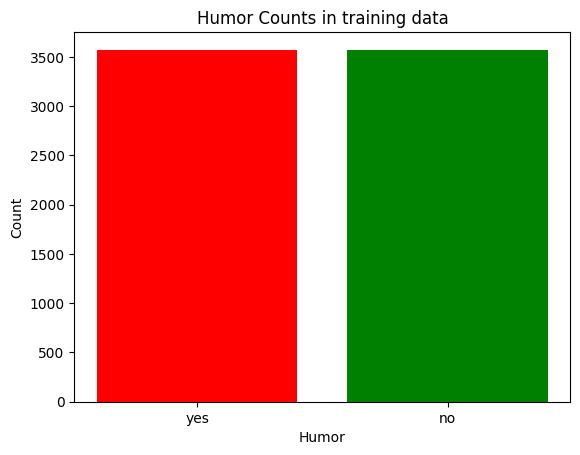

In [ ]:
import matplotlib.pyplot as plt

# Load the data
df = train

# Count the occurrences of the 'humor' column
humor_counts = df['humor'].value_counts()

# Create a bar plot of the humor counts with different colors
plt.bar(humor_counts.index, humor_counts.values, color=['red', 'green'])

# Set the title of the plot
plt.title('Humor Counts in training data')

# Set the x-axis label
plt.xlabel('Humor')

# Set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
test


,text,humor,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,n_text,noPunc_tweet,clean_tweet
330,قلك واحد حابس كان يمشي حتي صاب ورقه تاع تريسنت...,yes,12,58,3.916667,2,0,قلك حابس يمشي حتي صاب ورقه تاع تريسنتي فراح خلصها,قلك واحد حابس كان ىمشى حتى صاب ورقه تاع ترىسنت...,قلك حابس ىمشى حتى صاب ورقه تاع ترىسنتى فراح خلصها,قلك واحد حابس كان يمشي حتي صاب ورقه تاع تريسنت...,قلك واحد حابس كان يمشي حتي صاب ورقه تاع تريسنت...
7646,مره طلب استاذ الفنيه من التلاميذ يرسموا حمار ق...,no,15,77,4.200000,2,0,مره طلب استاذ الفنيه التلاميذ يرسموا حمار قالو...,مره طلب استاذ الفنىه من التلامىذ ىرسموا حمار ق...,مره طلب استاذ الفنىه التلامىذ ىرسموا حمار قالو...,مره طلب استاذ الفنيه من التلاميذ يرسموا حمار ق...,مره طلب استاذ الفنيه من التلاميذ يرسموا حمار ق...
1007,اش فش تش عش نش بش حش هش رش تش كش وش غش مش قش م...,yes,19,63,2.368421,0,0,اش فش تش عش نش بش حش هش رش تش كش وش غش مش قش م...,اش فش تش عش نش بش حش هش رش تش كش وش غش مش قش م...,اش فش تش عش نش بش حش هش رش تش كش وش غش مش قش م...,اش فش تش عش نش بش حش هش رش تش كش وش غش مش قش م...,اش فش تش عش نش بش حش هش رش تش كش وش غش مش قش م...
9371,لو الستات حطت في دماغها ان المجلس العسكري دا ج...,no,15,76,4.133333,4,0,الستات حطت دماغها ان المجلس العسكري دا جوزها ا...,لو الستات حطت فى دماغها ان المجلس العسكرى دا ج...,الستات حطت دماغها ان المجلس العسكرى دا جوزها ا...,لو الستات حطت في دماغها ان المجلس العسكري دا ج...,لو الستات حطت في دماغها ان المجلس العسكري دا ج...
3388,مراحل نوم وليد الفراج اليوم مع هزيمه النصر وتع...,no,13,77,5.000000,1,0,مراحل نوم وليد الفراج اليوم هزيمه النصر وتعادل...,مراحل نوم ولىد الفراج الىوم مع هزىمه النصر وتع...,مراحل نوم ولىد الفراج الىوم هزىمه النصر وتعادل...,مراحل نوم وليد الفراج اليوم مع هزيمه النصر وتع...,مراحل نوم وليد الفراج اليوم مع هزيمه النصر وتع...
...,...,...,...,...,...,...,...,...,...,...,...,...
3053,هذا مو مسلسل مشترك هذا مسلسل مصري و محمود مشار...,no,30,156,4.233333,7,0,مو مسلسل مشترك مسلسل مصري محمود مشارك بعدين وي...,هذا مو مسلسل مشترك هذا مسلسل مصرى و محمود مشار...,مو مسلسل مشترك مسلسل مصرى محمود مشارك بعدىن وى...,هذا مو مسلسل مشترك هذا مسلسل مصري و محمود مشار...,هذا مو مسلسل مشترك هذا مسلسل مصري و محمود مشار...
1894,جيزاني ضحك للدنيا تفلتت بوجهه,yes,5,29,5.000000,0,0,جيزاني ضحك للدنيا تفلتت بوجهه,جىزانى ضحك للدنىا تفلتت بوجهه,جىزانى ضحك للدنىا تفلتت بوجهه,جيزاني ضحك للدنيا تفلتت بوجهه,جيزاني ضحك للدنيا تفلتت بوجهه
1840,في بخيل وبخيله جابو ولد حطوه في البنك,yes,8,37,3.750000,2,0,بخيل وبخيله جابو ولد حطوه البنك,فى بخىل وبخىله جابو ولد حطوه فى البنك,بخىل وبخىله جابو ولد حطوه البنك,في بخيل وبخيله جابو ولد حطوه في البنك,في بخيل وبخيله جابو ولد حطوه في البنك
6170,فكره لرواد الاعمال الشباب تطبيق يقوم بصعق اي ش...,yes,11,59,4.454545,0,0,فكره لرواد الاعمال الشباب تطبيق يقوم بصعق اي ش...,فكره لرواد الاعمال الشباب تطبىق ىقوم بصعق اى ش...,فكره لرواد الاعمال الشباب تطبىق ىقوم بصعق اى ش...,فكره لرواد الاعمال الشباب تطبيق يقوم بصعق اي ش...,فكره لرواد الاعمال الشباب تطبيق يقوم بصعق اي ش...


In [ ]:
# convert labels from categorical to numeric
label_map = {
    'no' : 0,
    'yes': 1,
}

train['Offensive'] = train['humor'].apply(lambda x: label_map[x])
test['Offensive'] = test['humor'].apply(lambda x: label_map[x])
dataset['Offensive'] = dataset['humor'].apply(lambda x : label_map[x]);


In [ ]:
# Required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Feature extraction
train_features = train.n_text
train_target = train.Offensive

test_features = test.n_text
test_target = test.Offensive

# Create a pipeline with TfidfVectorizer and LogisticRegression
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'tfidfvectorizer__max_features': [1000, 5000, 10000],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

# Create and fit the GridSearchCV model
model = GridSearchCV(pipeline, param_grid, cv=5)
model.fit(train_features, train_target)

# Make predictions on the test set
predictions = model.predict(test_features)

# Print accuracy score and classification report
print(f"Accuracy score: {accuracy_score(test_target, predictions):.2f}")
print(classification_report(test_target, predictions))

# Make predictions on the whole dataset
dataset_predictions = model.predict(dataset['n_text'])

# Compute the confusion matrix
confusion_matrix_result = confusion_matrix(dataset['Offensive'], dataset_predictions)

# Print the confusion matrix
print(confusion_matrix_result)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy score is 0.67
              precision    recall  f1-score   support

           0       0.78      0.58      0.67      1125
           1       0.60      0.78      0.68       883

    accuracy                           0.67      2008
   macro avg       0.69      0.68      0.67      2008
weighted avg       0.70      0.67      0.67      2008

[[4042 1542]
 [ 316 4139]]
